In [1]:
from myproject.mypackage.pipeline import modelDictionary, runPipeline, find_outliers_z, boxplotGrid
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [2]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')
df.drop('PlayerID', axis=1, inplace=True)
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']

results = runPipeline(X, y,showChart=False, parameters={'model_name': 'nb'})
predictions = results['pipeline_results']['pred_df']
model = results['pipeline_results']['best_model']

model.predict(X)


accuracy: -0.836
Config: {}
Train R² Score: 0.8409
Test R² Score: 0.8365
Test Set Accuracy: 0.8365
---------------------------


array(['Medium', 'Medium', 'High', ..., 'High', 'Medium', 'Medium'],
      shape=(40034,), dtype='<U6')

In [3]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')
df.drop('PlayerID', axis=1, inplace=True)
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']
y


describe_number = df.describe()

#runPipeline(X, y, {'model': 'nb'})

#modelDictionary()

describe_number


def get_object_cols(df):
    
    pivot_describe = df.describe(include='O')
    dummy_df = df[pivot_describe.columns[pivot_describe.loc['unique'] == 2].to_list()]
    encode_df = df[pivot_describe.columns[pivot_describe.loc['unique'] > 2].to_list()]

    result = {'describe_pivot': pivot_describe, 'dummy_df': dummy_df, 'encode_df': encode_df}

    return result

def assignDummies(dummy_df):
    dummies = pd.get_dummies(dummy_df, prefix='dummy', drop_first=True)
    return dummies

def assignEncoding(encode_df):
    encoder = OneHotEncoder(sparse_output=False)
    encode_transform = encoder.fit_transform(encode_df)
    encoded = pd.DataFrame(encode_transform, columns=encoder.get_feature_names_out(encode_df.columns))
    return encoded

def encodeDataframe(df):
    new_df = df.copy()
    dummy_cols = get_object_cols(new_df)['dummy_df']
    encode_cols = get_object_cols(new_df)['encode_df']

    new_df.drop(columns=list(dummy_cols.columns) + list(encode_cols.columns), axis=1, inplace=True)

    dummy_df = assignEncoding(dummy_cols)
    encode_df = assignEncoding(encode_cols)

    combined_df = pd.concat([new_df, dummy_df, encode_df], axis=1)
    
    return combined_df

def correlation_heatmap(df):
    plt.figure(figsize=(12, 10))
    correlation_matrix = df.corr(numeric_only=True)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
    plt.title('Correlation Heatmap')
    plt.show()

encoded_X = encodeDataframe(X)
#correlation_heatmap(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.4, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Import Required Libraries and apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_sc, y_train)

# Predict on testing set
y_pred_nb = nb_model.predict(X_test_sc)
y_pred_prob_nb = nb_model.predict_proba(X_test_sc)


# Determine the class order
class_order = nb_model.classes_
print("Class order:", class_order)

# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_nb,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_nb[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()



Class order: ['High' 'Low' 'Medium']


,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.20,0.08,0.72
22227,Medium,Medium,0.22,0.17,0.61
24899,Medium,Medium,0.01,0.32,0.67
35415,Medium,Medium,0.22,0.16,0.62
21440,Medium,Medium,0.32,0.17,0.51


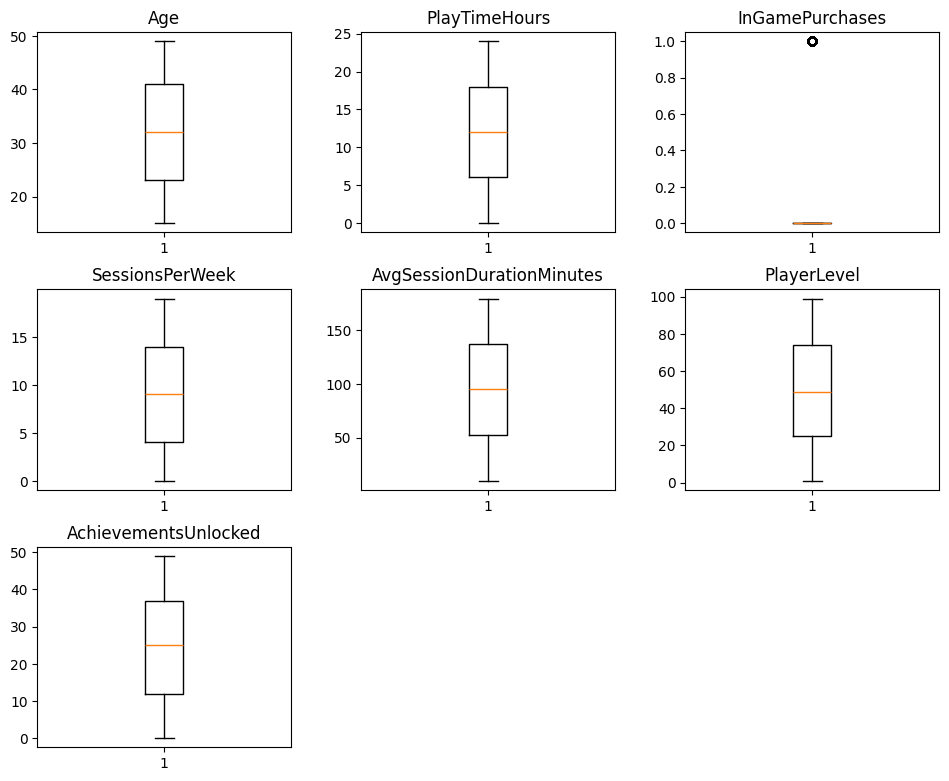

In [4]:
boxplotGrid(df)